## <strong>Step: Reading Data from heart.csv file to Heart_dataset DataFrame</strong>

In [1]:
import pandas as pd
Heart_dataset = pd.read_csv('heart1.csv', sep=',')
# to print the first five rows
print(Heart_dataset.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [2]:
# to get the information about the data
print(Heart_dataset.info() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB
None


In [3]:
# to check if the data is balance or unbalanced
print(Heart_dataset.target.value_counts())

1    164
0    138
Name: target, dtype: int64


## <strong>Step: Data PreProcessing step. (Checking if null value exist.)</strong>

In [4]:
Heart_dataset.target.value_counts()
# Checking if the dataframe has any null values or not.
print(Heart_dataset.isnull().sum() )

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [5]:
# to remove duplicates
print(Heart_dataset.drop_duplicates(keep = False, inplace = True))

None


## <strong>Step: Data Visulization</strong>

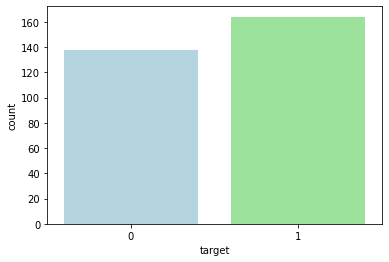

In [6]:
import matplotlib as plt
import seaborn as sns
sns.countplot(x="target", data=Heart_dataset, palette=['#Add8E6', '#90EE90'])
plt.pyplot.savefig('target-count.png')
plt.pyplot.show()

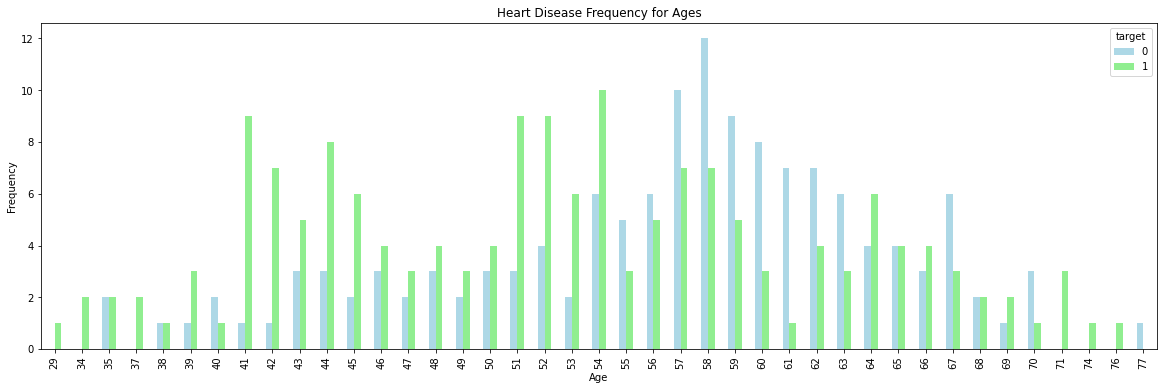

In [7]:
import matplotlib as plt
pd.crosstab(Heart_dataset.age,Heart_dataset.target).plot(kind="bar",figsize=(20,6),color=['#Add8E6', '#90EE90'])
plt.pyplot.title('Heart Disease Frequency for Ages')
plt.pyplot.xlabel('Age')
plt.pyplot.ylabel('Frequency')
plt.pyplot.savefig('heartDiseaseAndAges.png')
plt.pyplot.show()

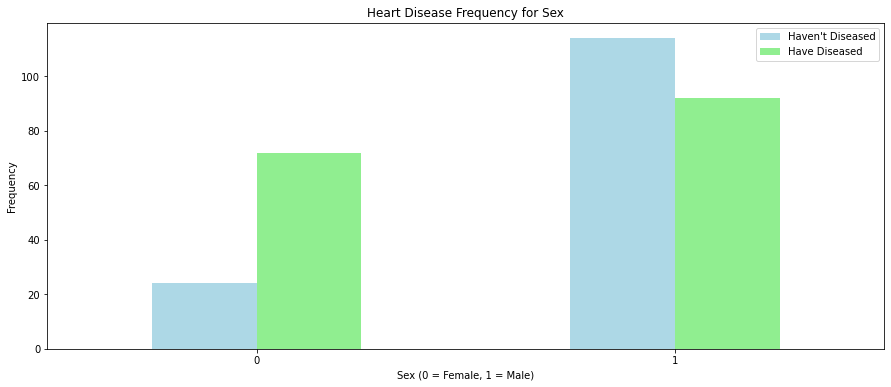

In [8]:
pd.crosstab(Heart_dataset.sex,Heart_dataset.target).plot(kind="bar",figsize=(15,6),color=['#Add8E6', '#90EE90'])
plt.pyplot.title('Heart Disease Frequency for Sex')
plt.pyplot.xlabel('Sex (0 = Female, 1 = Male)')
plt.pyplot.xticks(rotation=0)
plt.pyplot.legend(["Haven't Diseased", "Have Diseased"])
plt.pyplot.ylabel('Frequency')
plt.pyplot.savefig('Heart Disease Frequency for Sex.png')
plt.pyplot.show()

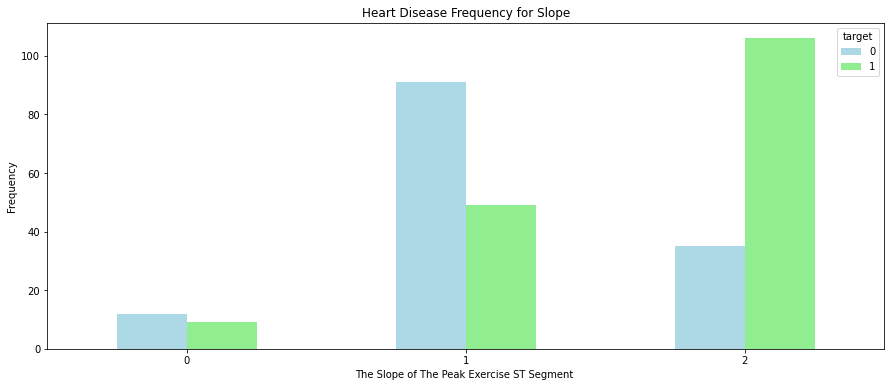

In [9]:
pd.crosstab(Heart_dataset.slope,Heart_dataset.target).plot(kind="bar",figsize=(15,6),color=['#Add8E6', '#90EE90'])
plt.pyplot.title('Heart Disease Frequency for Slope')
plt.pyplot.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.pyplot.xticks(rotation = 0)
plt.pyplot.ylabel('Frequency')
plt.pyplot.savefig('Heart Disease Frequency for Slope.png')
plt.pyplot.show()

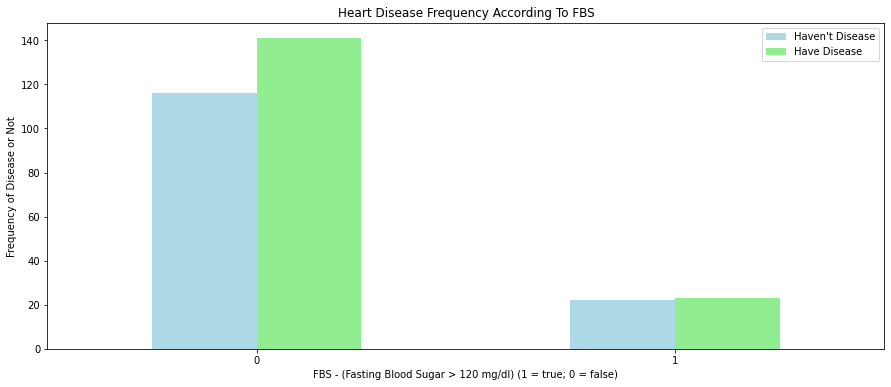

In [10]:
pd.crosstab(Heart_dataset.fbs,Heart_dataset.target).plot(kind="bar",figsize=(15,6),color=['#Add8E6', '#90EE90'])
plt.pyplot.title('Heart Disease Frequency According To FBS')
plt.pyplot.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.pyplot.xticks(rotation = 0)
plt.pyplot.legend(["Haven't Disease", "Have Disease"])
plt.pyplot.ylabel('Frequency of Disease or Not')
plt.pyplot.savefig('Heart Disease Frequency According to FBS.png')
plt.pyplot.show()

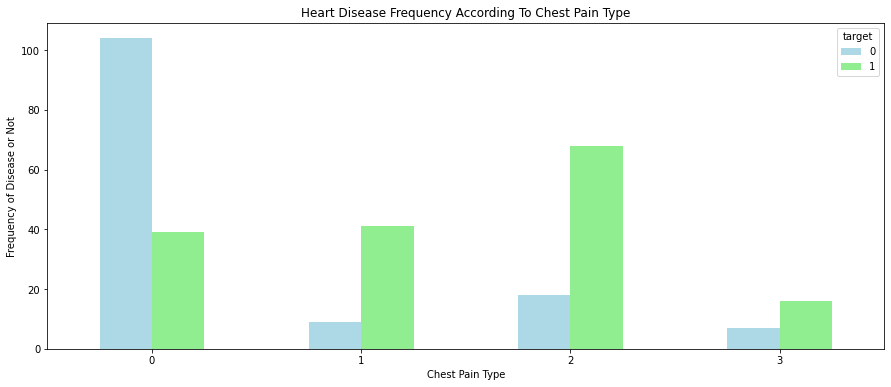

In [11]:
pd.crosstab(Heart_dataset.cp,Heart_dataset.target).plot(kind="bar",figsize=(15,6),color=['#Add8E6', '#90EE90'])
plt.pyplot.title('Heart Disease Frequency According To Chest Pain Type')
plt.pyplot.xlabel('Chest Pain Type')
plt.pyplot.xticks(rotation = 0)
plt.pyplot.ylabel('Frequency of Disease or Not')
plt.pyplot.savefig('Heart Disease Frequency According to Chest Pain Type.png')
plt.pyplot.show()

## <strong>Step: Display Correlation Heatmap</strong>

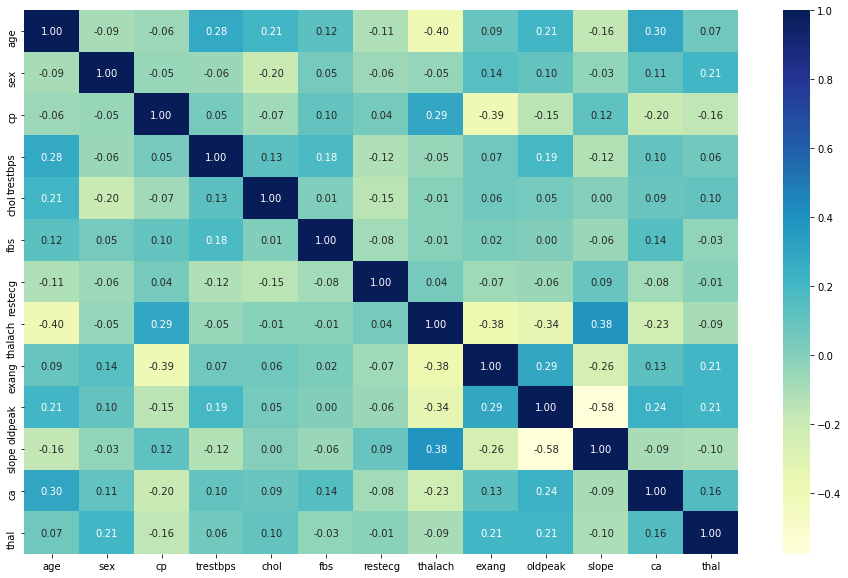

In [12]:
df = Heart_dataset.loc[:, :'thal']
corrMatrix = df.corr()
plt.pyplot.figure(figsize=(16,10))
sns.heatmap(corrMatrix, cbar=True,annot=True,fmt='.2f',cmap="YlGnBu")
plt.pyplot.savefig('Correlation Heatmap.png')
plt.pyplot.show()

## <strong>Step : Splitting Data for training and testing.
#### Training set : 80% and Testing set : 20% </strong>

In [13]:
from sklearn.model_selection import train_test_split
X = Heart_dataset.loc[:,:'thal']
y = Heart_dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.2 )

## Step: Importing Basic Libraries

In [14]:
# importing the libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score  
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import numpy as np


## Step: Running different models

In [15]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Step 1: Create the model
LR_model = LogisticRegression(solver='liblinear')
# Step 2: Fit the training data into the model
LR_model.fit(X_train, y_train)
# Step 3: Predict the result
LR_y_test_hat = LR_model.predict(X_test)
# Step 4: Calculate the different metrics 
LR_Accuracy = accuracy_score(y_test,LR_y_test_hat, normalize = True) * 100 
LR_Precision = precision_score(y_test,LR_y_test_hat)
LR_Recall = recall_score(y_test,LR_y_test_hat)
LR_F1_score = f1_score(y_test,LR_y_test_hat)

In [16]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB 

# Step 1: Create the model
Naive_model = GaussianNB()
# Step 2: Fit the training data into the model
Naive_model.fit(X_train, y_train)
# Step 3: Predict the result
Naive_y_test_hat = Naive_model.predict(X_test)
# Step 4: Calculate the different metrics 
Naive_Accuracy = accuracy_score(y_test,Naive_y_test_hat, normalize = True) * 100 
Naive_Precision = precision_score(y_test,Naive_y_test_hat)
Naive_Recall = recall_score(y_test,Naive_y_test_hat)
Naive_F1_score = f1_score(y_test,Naive_y_test_hat)

In [17]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
accuracy_DTC = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

print("Cross Validation Scores for KNN: {}".format(accuracy_DTC))
param_grid = {'n_neighbors':  range(2, 20)}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(model, param_grid, cv = cv, scoring='accuracy',
                    return_train_score=True)
grid.fit(X, y)

print("Best Parameter:",grid.best_params_)
print("Best Cross Vlidation Score: ",grid.best_score_)


Cross Validation Scores for KNN: [0.54098361 0.60655738 0.73333333 0.66666667 0.56666667]
Best Parameter: {'n_neighbors': 17}
Best Cross Vlidation Score:  0.672568306010929


In [18]:
# Step 1: Create the model
KNN_model = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
# Step 2: Fit the training data into the model
KNN_model.fit(X_train, y_train)
# Step 3: Predict the result
KNN_y_test_hat = KNN_model.predict(X_test)
# Step 4: Calculate the different metrics 
KNN_Accuracy = accuracy_score(y_test,KNN_y_test_hat, normalize = True) * 100 
KNN_Precision = precision_score(y_test,KNN_y_test_hat)
KNN_Recall = recall_score(y_test,KNN_y_test_hat)
KNN_F1_score = f1_score(y_test,KNN_y_test_hat)


In [19]:
# Support vector classifier
from sklearn.svm import SVC 

# Step 1: Create the model
SVC_model = SVC(kernel='linear', C=1, gamma="auto",probability=True) 
# Step 2: Fit the training data into the model
SVC_model.fit(X_train, y_train)
# Step 3: Predict the result
SVC_y_test_hat = SVC_model.predict(X_test)
# Step 4: Calculate the different metrics 
SVC_Accuracy = accuracy_score(y_test,SVC_y_test_hat, normalize = True) * 100 
SVC_Precision = precision_score(y_test,SVC_y_test_hat)
SVC_Recall = recall_score(y_test,SVC_y_test_hat)
SVC_F1_score = f1_score(y_test,SVC_y_test_hat)


In [20]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
accuracy_DTC = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

print("Cross Validation Scores for DTC: {}".format(accuracy_DTC))
print("Mean Accuracy Score for DTC: {}".format(np.mean(accuracy_DTC)))

param_grid = {'max_depth':  range(2, 20)}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(model, param_grid, cv = cv, scoring='accuracy',
                    return_train_score=True)
grid.fit(X, y)

print("Best Parameter:",grid.best_params_)
print("Best Cross Vlidation Score: ",grid.best_score_)




Cross Validation Scores for DTC: [0.72131148 0.63934426 0.78333333 0.81666667 0.73333333]
Mean Accuracy Score for DTC: 0.7387978142076502
Best Parameter: {'max_depth': 3}
Best Cross Vlidation Score:  0.8046448087431693


In [21]:
# Step 1: Create the model
DTC_model = DecisionTreeClassifier(max_depth=grid.best_params_['max_depth'])
# Step 2: Fit the training data into the model
DTC_model.fit(X_train, y_train)
# Step 3: Predict the result
DTC_y_test_hat = DTC_model.predict(X_test)
# Step 4: Calculate the different metrics 
DTC_Accuracy = accuracy_score(y_test,DTC_y_test_hat, normalize = True) * 100 
DTC_Precision = precision_score(y_test,DTC_y_test_hat)
DTC_Recall = recall_score(y_test,DTC_y_test_hat)
DTC_F1_score = f1_score(y_test,DTC_y_test_hat)


In [22]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#'max_features': ['auto', 'sqrt', 'log2'],
#  max_features= gridsearch.best_params_['max_features'],
# Parameter evaluation
rfclf = RandomForestClassifier(random_state=42)
parameters={'n_estimators': [50, 100],
            'max_depth' : [4,5,6,7,8,9,10,11,12,13,14,15],
            'criterion' :['gini', 'entropy']
}
gridsearch=GridSearchCV(rfclf, parameters, cv=10, scoring='roc_auc', n_jobs = -1)
gridsearch.fit(X, y)
print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 50}
0.9171723497091143


In [23]:
# Step 1: Create the model
RFC_model = RandomForestClassifier(criterion= gridsearch.best_params_['criterion'], max_depth= gridsearch.best_params_['max_depth'], n_estimators= gridsearch.best_params_['n_estimators'], random_state=0)
# Step 2: Fit the training data into the model
RFC_model.fit(X_train,y_train)
# Step 3: Predict the result
RFC_y_test_hat  = RFC_model.predict(X_test)
# Step 4: Calculate the different metrics 
RFC_Accuracy = accuracy_score(y_test,RFC_y_test_hat, normalize = True) * 100 
RFC_Precision = precision_score(y_test,RFC_y_test_hat)
RFC_Recall = recall_score(y_test,RFC_y_test_hat)
RFC_F1_score = f1_score(y_test,RFC_y_test_hat)


## <strong>Step: Display and Compare Accuracies of different Models</strong>

In [24]:
print("\nOut-Sample Accuracy for :")
print("\tLogistic Regression:",LR_Accuracy)
print("\tNaive Bayes:",Naive_Accuracy)
print("\tKNeighbors Classifier:",KNN_Accuracy)
print("\tSupport Vector Classifier:",SVC_Accuracy)
print("\tDecision Tree Classifier:",DTC_Accuracy)
print("\tRandom Forest Classifier:",RFC_Accuracy)


Out-Sample Accuracy for :
	Logistic Regression: 85.24590163934425
	Naive Bayes: 90.1639344262295
	KNeighbors Classifier: 67.21311475409836
	Support Vector Classifier: 86.88524590163934
	Decision Tree Classifier: 77.04918032786885
	Random Forest Classifier: 88.52459016393442


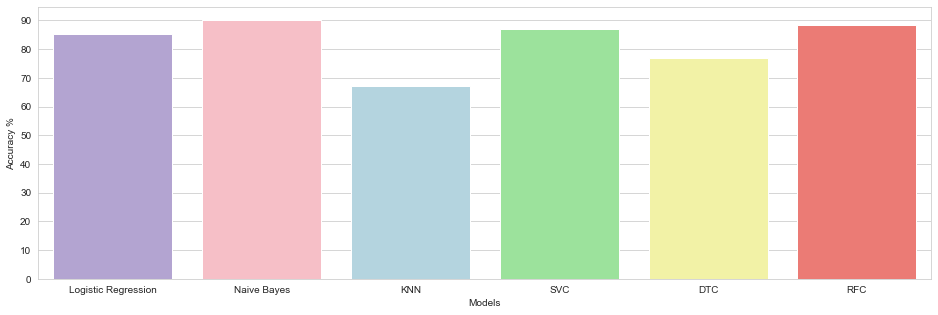

In [25]:
accuracies = {'Logistic Regression':LR_Accuracy,'Naive Bayes':Naive_Accuracy,'KNN':KNN_Accuracy,'SVC':SVC_Accuracy,'DTC':DTC_Accuracy,'RFC':RFC_Accuracy}
colors = ['#B19CD9','#FFB6C1', '#ADD8E6', '#90EE90', "#FFFF99","#FF6961"]

sns.set_style("whitegrid")
plt.pyplot.figure(figsize=(16,5))
plt.pyplot.yticks(np.arange(0,110,10))
plt.pyplot.ylabel("Accuracy %")
plt.pyplot.xlabel("Models")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.pyplot.savefig('Accuracies Comparision.png')
plt.pyplot.show()

## <strong>Step: Different parameters for comparisions. </strong>

In [26]:
print("\nLogistic Regression:")
print("\tPrecision:",LR_Precision)
print("\tRecall:",LR_Recall)
print("\tF1 score:",LR_F1_score)

print("\nNaive Bayes:")
print("\tPrecision:",Naive_Precision)
print("\tRecall:",Naive_Recall)
print("\tF1 score:",Naive_F1_score)

print("\nKNeighbors Classifier:")
print("\tPrecision:",KNN_Precision)
print("\tRecall:",KNN_Recall)
print("\tF1 score:",KNN_F1_score)

print("\nSupport Vector Classifier:")
print("\tPrecision:",SVC_Precision)
print("\tRecall:",SVC_Recall)
print("\tF1 score:",SVC_F1_score)

print("\nDecision Tree Classifier:")
print("\tPrecision:",DTC_Precision)
print("\tRecall:",DTC_Recall)
print("\tF1 score:",DTC_F1_score)


print("\nRandom Forest Classifier: ")
print("\tPrecision:",RFC_Precision)
print("\tRecall:",RFC_Recall)
print("\tF1 score:",RFC_F1_score)



Logistic Regression:
	Precision: 0.8571428571428571
	Recall: 0.8823529411764706
	F1 score: 0.8695652173913043

Naive Bayes:
	Precision: 0.9117647058823529
	Recall: 0.9117647058823529
	F1 score: 0.9117647058823528

KNeighbors Classifier:
	Precision: 0.7058823529411765
	Recall: 0.7058823529411765
	F1 score: 0.7058823529411765

Support Vector Classifier:
	Precision: 0.8611111111111112
	Recall: 0.9117647058823529
	F1 score: 0.8857142857142858

Decision Tree Classifier:
	Precision: 0.75
	Recall: 0.8823529411764706
	F1 score: 0.8108108108108107

Random Forest Classifier: 
	Precision: 0.8857142857142857
	Recall: 0.9117647058823529
	F1 score: 0.8985507246376812


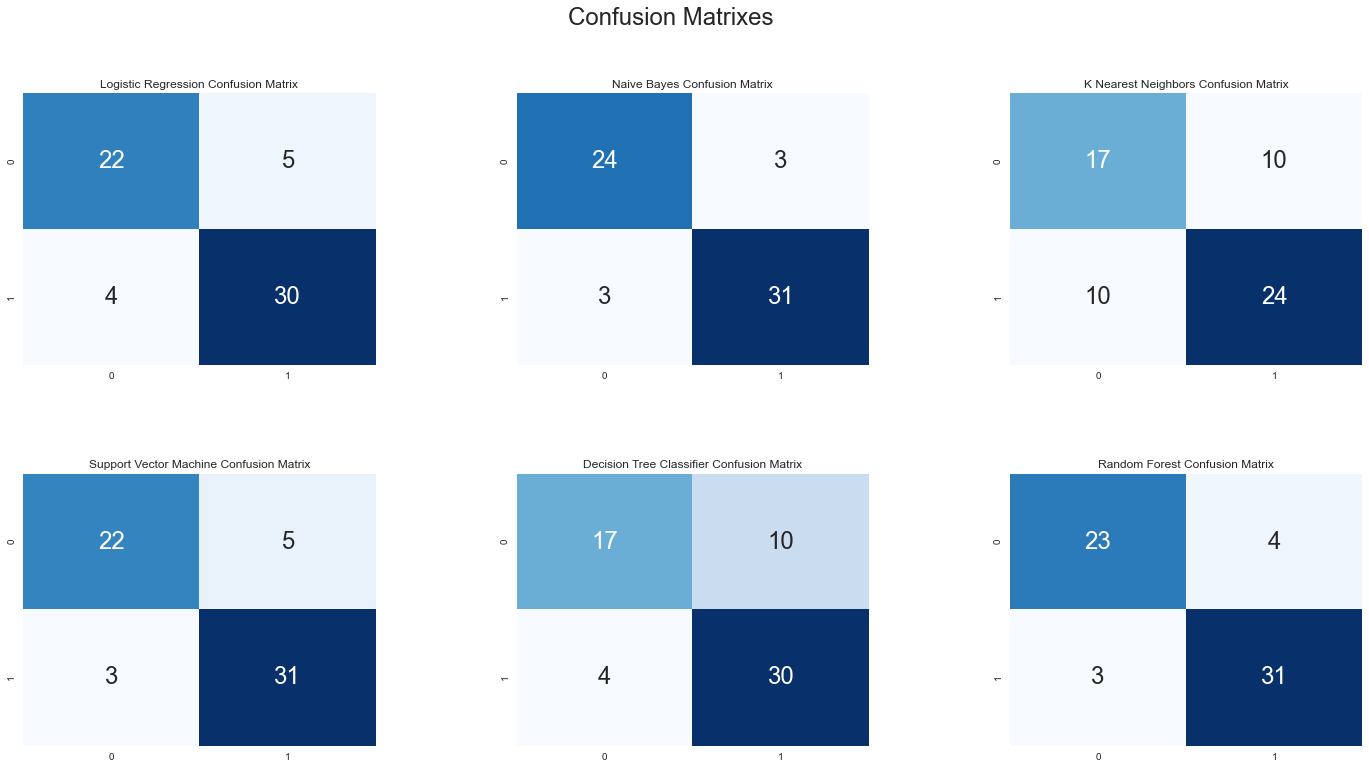

In [27]:
from sklearn.metrics import confusion_matrix
plt.pyplot.figure(figsize=(24,12))

plt.pyplot.suptitle("Confusion Matrixes",fontsize=24)
plt.pyplot.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.pyplot.subplot(2,3,1)
plt.pyplot.title("Logistic Regression Confusion Matrix")
sns.heatmap(confusion_matrix(y_test,LR_y_test_hat),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.pyplot.subplot(2,3,2)
plt.pyplot.title("Naive Bayes Confusion Matrix")
sns.heatmap(confusion_matrix(y_test,Naive_y_test_hat),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.pyplot.subplot(2,3,3)
plt.pyplot.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(confusion_matrix(y_test,KNN_y_test_hat),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.pyplot.subplot(2,3,4)
plt.pyplot.title("Support Vector Machine Confusion Matrix")
sns.heatmap(confusion_matrix(y_test,SVC_y_test_hat),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.pyplot.subplot(2,3,5)
plt.pyplot.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(confusion_matrix(y_test,DTC_y_test_hat),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.pyplot.subplot(2,3,6)
plt.pyplot.title("Random Forest Confusion Matrix")
sns.heatmap(confusion_matrix(y_test,RFC_y_test_hat),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.pyplot.savefig('Confusion Matirx.png')
plt.pyplot.show()

In [28]:
from sklearn.metrics import classification_report

print("\nLogistic Regression:")
print("\tClassification_report")
print(classification_report(y_test,LR_y_test_hat))

print("\nNaive Bayes:")
print("\tClassification_report")
print(classification_report(y_test,Naive_y_test_hat))


print("\nKNeighbors Classifier:")
print("\tClassification_report:")
print(classification_report(y_test,KNN_y_test_hat))


print("\nSupport Vector Classifier:")
print("\tClassification_report:")
print(classification_report(y_test,SVC_y_test_hat))


print("\nDecision Tree Classifier:")
print("\tClassification_report:")
print(classification_report(y_test,DTC_y_test_hat))


print("\nRandom Forest Classifier: ")
print("\tClassification_report:")
print(classification_report(y_test,RFC_y_test_hat))



Logistic Regression:
	Classification_report
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61


Naive Bayes:
	Classification_report
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        27
           1       0.91      0.91      0.91        34

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61


KNeighbors Classifier:
	Classification_report:
              precision    recall  f1-score   support

           0       0.63      0.63      0.63        27
           1       0.71      0.71      0.71        34

    accuracy                           0.67        6